In [1]:
import numpy as np

# Week 1 Python Part 4:  Plotting and Other considerations

## Pointers
Before we start the lecture in earnest, lets talk about pointers.

"python gives you the illusion of safety until you accidentally chop your own leg off" -- my brother in law

In Python and other programming languages we have pointers for variable assignments, which basically allows you to use a single spot in memory for multiple variables.  This won't be an issue for single variables, but will be an issue for lists and arrays.  For example:

In [11]:
# Changing A1 is going to change A even though we did not want to
A = np.array([[1,1], [1,1]])
print('A = ',A, '\n') # '\n' adds a linebreak
A1 = A
A1[0,1] = 2
print('A1 = ',A1)
print('A = ', A)

A =  [[1 1]
 [1 1]] 

A1 =  [[1 2]
 [1 1]]
A =  [[1 2]
 [1 1]]


In [12]:
# If we use copy(), we can change A1 without changing A
A = np.array([[1,1], [1,1]])
print('A = ',A, '\n') # '\n' adds a linebreak
A1 = A.copy()
A1[0,1] = 2
print('A1 = ',A1)
print('A = ', A)

A =  [[1 1]
 [1 1]] 

A1 =  [[1 2]
 [1 1]]
A =  [[1 1]
 [1 1]]


When in doubt .copy() it out.

## Rest of the lecture

In this lecture, we will go over how to create graphs in python.  As an example, let's start by trying to plot the curve $y = x^2 - 3$.  

The method python uses to create graphs is very similar to the way you were probably taught in your first algebra class.  You first make a list of x-values, then you plug each x-value into your formula to find a corresponding y-value, then you plot eachof these $(x, y)$ pairs as a point on your graph.  Once you plot enough points, you can then connect the dots in some way to make the picture look like a smooth curve.  

To do this in python, you first need to create an array that will hold all of your $x$-values.  This array is usually one-dimensional, but it can also be a column vector (i.e., a 2D array with only one column), but not a row vector.  Unless you have a specific reason not to, it is common to just create evenly spaced $x$-values using either the `arange` or `linspace` functions.  For example, if we wanted to plot our curve between `x = -2` and `x = 3`, then we could use the code 

In [ ]:
x = np.linspace(-2, 3, 10)
print(x)

[-2.         -1.44444444 -0.88888889 -0.33333333  0.22222222  0.77777778
  1.33333333  1.88888889  2.44444444  3.        ]


to make ten evenly spaced $x$-values.  Alternatively, we could use the code 

In [ ]:
x = np.arange(-2, 3.5, 0.5)
print(x)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


to make the $x$-values 0.5 apart.  Notice that we had to use 3.5 instead of 3 as the second argument, because the `arange` function makes an array whose elements go up to, but do not include, that value.  

The choice of $x$-values is up to you, but we will soon see that using more values will usually make your graph look nicer.  

Next, you need to plug each of your $x$-values into the formula for whatever function you are trying to plot.  In our case, we want to plot $y = x^2 - 3$, so we need to square each entry of `x` and then subtract `3` from each entry.  This is a place where elementwise operations are extremely useful.  We can use the code 

In [ ]:
y = x ** 2 - 3
print(y)

[ 1.   -0.75 -2.   -2.75 -3.   -2.75 -2.   -0.75  1.    3.25  6.  ]


Now we have everything we need to make a graph.  We do so using the plot command. Unfortunately, the plot command is not part of the numpy package or core python, so we will have to import another package.  `plot` is part of the package `pyplot`, which is itself part of the package `matplotlib`.  We can therefore get access to `plot` with the code 

In [ ]:
import matplotlib.pyplot

As with `numpy`, we would now have to prefix every function we use from `pyplot` with `matplotlib.pyplot.`.  This quickly gets annoying, so we will give the package a shorter name.  

In [ ]:
import matplotlib.pyplot as plt

This is another line that we will see a lot in this class.  Any time you want to make graphs, you will need this import statement.  

The basic syntax for plotting is `plt.plot(array_of_x_values, array_of_y_values)`.  For instance, 

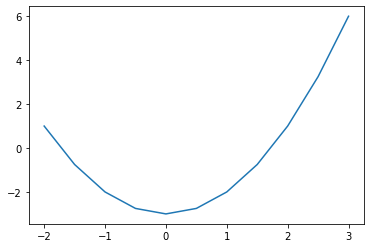

In [ ]:
plt.plot(x, y)

If you are working in a Jupyter notebook like this, the figure will show up in the document.  Otherwise, you need to include the command `plt.show()` after making your graph.  This will make the figure pop up in its own window or tab.  

Notice that this isn't really a smooth curve.  Python has plotted the 11 points that we specified with the arrays x and y and then just connected the dots with straight lines.  

## Line Properties
### Color
We can modify the appearance of this graph in many different ways.  For example, we might want to change the color of the line.  There are two ways to do so.  First, python has several shortcuts for colors.  For example, "k" stands for black, "b" stands for blue and "r" stands for red.  (You can find a list of all of these shortcuts in the [documentation for plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html).)  If we wanted a red curve, we could use 

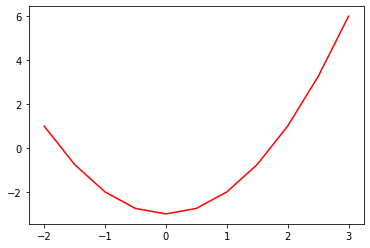

In [ ]:
plt.plot(x, y, "r")

(Note that the quotation marks are necessary.  You can use single quotes, like `'r'`, or double quotes, like `"r"`, but you can't just use `r`.)  There are only a few pre-defined colors, but you can use any color you want by specifying the RGB value or a hex code.  (Any reasonable paint program or online color picker will give you these values; you don't have to remember them.)  As an example, the hex code #7E2F8E stands for a shade of purple.  You can specify this color with 

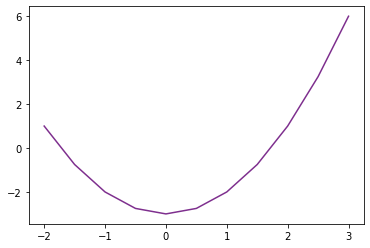

In [ ]:
plt.plot(x, y, color="#7E2F8E")

Again, notice the quotation marks.  They can be either single or double quotes, but they are not optional.  

### Style
You can also change the line style (for instance, dotted lines, dashed lines, etc.)  There are shortcut symbols for all of these.  You do not need to memorize the symbols - you can look them up in the python documentation for `plot` whenever necessary.  As an example, the shortcut `":"` stands for dotted line, so you can use 

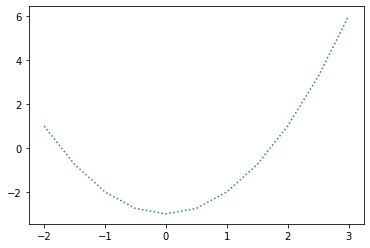

In [ ]:
plt.plot(x, y, ":")

to make a dotted curve.  Shortcuts can be combined, so you could make a red dotted line with 

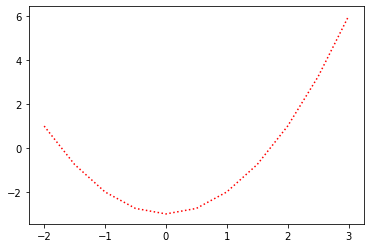

In [ ]:
plt.plot(x, y, "r:")

You can also specify these with a more verbose syntax like so: 

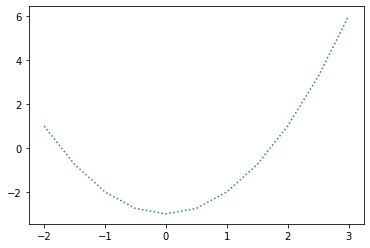

In [ ]:
plt.plot(x, y, linestyle=":")

This is not as useful as with colors, because all of the line styles have a shortcut.  

### Marker Shape
You can also specify the shape of the markers (i.e., the shape python puts at each data point).  As with the line style, there are shortcuts for all of the available shapes.  One particularly common one is "o", which makes circles at each point.  For instance, 

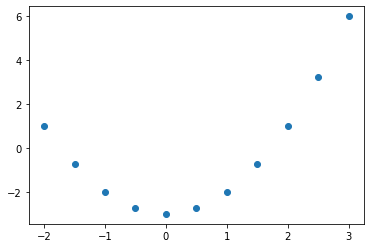

In [ ]:
plt.plot(x, y, "o")

You can combine any of these shortcuts.  For instance, the following code makes a black dotted line with circles at each point: 

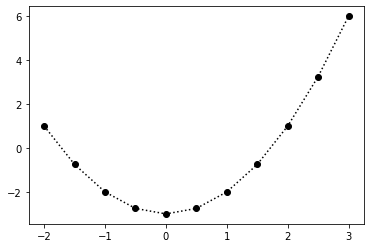

In [ ]:
plt.plot(x, y, "k:o")

There is also a more verbose syntax: 

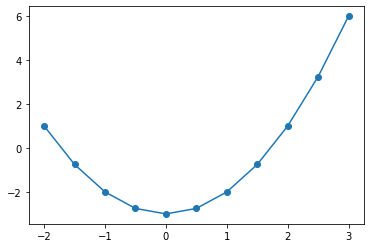

In [ ]:
plt.plot(x, y, marker="o")

There are many other options that you can modify, but the others don't come with shortcut symbols.  They can all be modified with the long version of the syntax above.  As one example, you can chagne the width of the line with the `linewidth` option like so: 

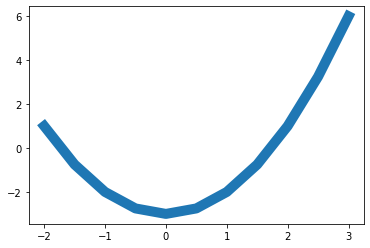

In [ ]:
plt.plot(x, y, linewidth=10)

You can combine as many options as you want in this way.  For example, 

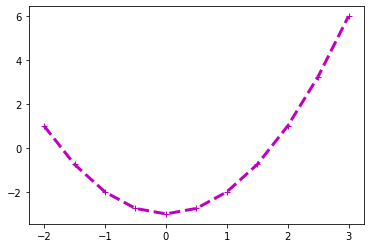

In [ ]:
plt.plot(x, y, color="m", linestyle="--", linewidth=3, marker="+")

There are many more options.  I encourage you to look through the documentation for `plot` and try different things out.  I will not give you exact specifications for plots in this class, but I will expect you to choose options that make your graph look decent.  For instance, if you are plotting more than one curve on the same graph (which we will do in a moment), then you should make each one a different color.  

## Labels and Titles
You can also customize the rest of the graph as well.  We will only look at a few of the simplest options here, but I strongly encourage you to explore the python documentation and see how to change other features.  

Two of the most useful things you can change are the axis labels and titles.  You can do so with the functions (all from the `pyplot` package) `xlabel`, `ylabel` and `title`.  Each takes one input: a string of text (encased in quotation marks) that weill be displayed in the appropriate place.  For instance, 

Text(0.5, 1.0, 'Graph of a parabola')

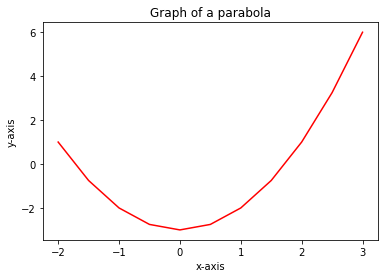

In [ ]:
plt.plot(x, y, "r")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Graph of a parabola")

For the rest of this class, **every plot you make should have axis labels and a title**, even if the labels are just "x" and "y".  

## Plotting Multiple Curves
Very often, we will want to plot more than one curve.  Fortunately, this is very easy in python: You just use multiple plot commands.  For example, let's try to plot $y = x^2 - 3$ in red and $y = x^3 + 2x - 5$ in black.  We can use the code

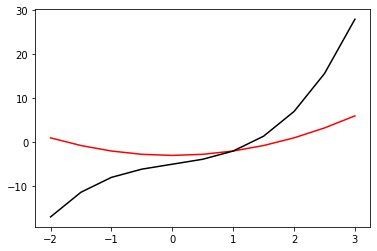

In [ ]:
x = np.arange(-2, 3.5, 0.5)
y = x ** 2 - 3
z = x ** 3 + 2 * x - 5
plt.plot(x, y, "r")
plt.plot(x, z, "k")

It is also possible to combine both into a single plot command.  The general syntax is `plt.plot(x1, y1, options, x2, y2, options)`.  For example, 

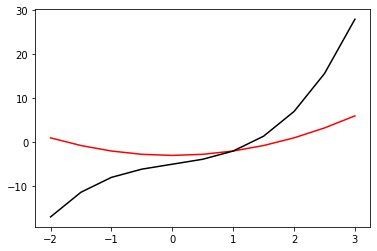

In [ ]:
plt.plot(x, y, "r", x, z, "k")

If you include multiple curves on the same plot like this, it is always good practice to add a legend so that readers will be able to understand your graph.  You can do so with the `legend` command, which is also part of `pyplot`.  The syntax is `plt.legend((label1, label2, ...))`, where each label is encased in quotation marks.  The labels should go in the same order that you made the plots.  For example, 

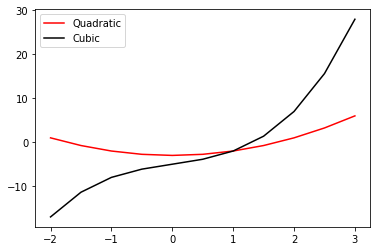

In [ ]:
plt.plot(x, y, "r")
plt.plot(x, z, "k")
plt.legend(("Quadratic", "Cubic"))

Notice that the call to legend requires two sets of parentheses, unlike most of the other commands we've seen.  (We'll talk about why when we learn how to define functions.)

In this case, the legend is in a pretty good location, but often python will put it somewhere you don't want, such as covering up one of the curves.  You can manually adjust the position with the following syntax: 

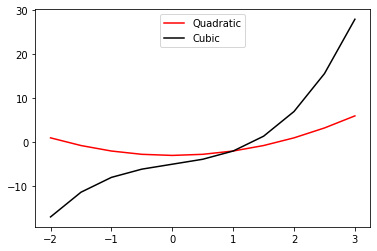

In [ ]:
plt.plot(x, y, "r")
plt.plot(x, z, "k")
plt.legend(("Quadratic", "Cubic"), loc="upper center")

I highly recommend that you look through the documentation for the legend function to see more ways to customize this property.  In this class, I will not specify exactly what your graph should look like, but you are responsible for making it neat and legible.  

If you want different graphs on different figures, you can open a new figure window with the `figure` command.  The syntax is `plt.figure(figure_number)`.  For example, 

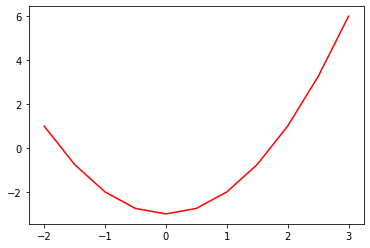

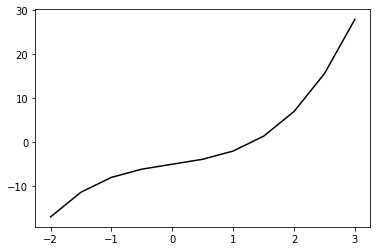

In [ ]:
plt.figure(1)
plt.plot(x, y, "r")

plt.figure(2)
plt.plot(x, z, "k")

It is good practice to use the figure command every time you make a new plot, but if you are only making one graph then python will generally do it for you.  